# Stock Volatility Example

Taken from **Python for Finance:** *Analyze Big Financial Data* Yves Hilpisch pp.18-19

Revised a bit by Jim Northey (jnorthey@mtu.edu)

Change log:
[pandas data reader](https://github.com/plotly/documentation/issues/657) Explains the separation of the datareader to a separate module and how to change.

In terminal mode run: ```pip install pandas-datareader```


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime

ticker='GM'
end_date = datetime.date.today()
start_date=end_date.replace(year=end_date.year-1)

historical_prices = web.DataReader(ticker, data_source='yahoo',start=start_date,end=end_date)
print(historical_prices)
historical_prices['Logreturn'] = np.log(historical_prices['Close'] / historical_prices['Close'].shift(1))
print(historical_prices['Logreturn'])
historical_prices['Volatility'] = historical_prices['Logreturn'].rolling(window=30).std() * np.sqrt(252)
print(historical_prices['Volatility']);

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2018-10-17  32.290001  31.580000  32.060001  31.930000   9099000.0  30.647919
2018-10-18  31.809999  30.969999  31.709999  31.080000  14349100.0  29.832048
2018-10-19  31.469999  30.570000  30.719999  31.200001  12754600.0  29.947231
2018-10-22  31.590000  31.030001  31.450001  31.340000  11052900.0  30.081612
2018-10-23  32.400002  30.889999  30.940001  32.119999  16580800.0  30.830288
...               ...        ...        ...        ...         ...        ...
2019-10-10  35.299999  34.209999  34.450001  34.660000  10914900.0  34.660000
2019-10-11  36.000000  35.209999  35.220001  35.570000  12177900.0  35.570000
2019-10-14  35.560001  35.270000  35.389999  35.500000   5630700.0  35.500000
2019-10-15  36.560001  35.169998  35.470001  36.259998  10249400.0  36.259998
2019-10-16  37.220001  36.450001  36.490002  36.650002  13294400

[Stack Overflow help on updates to pandas library](https://stackoverflow.com/questions/40742364/pandas-rolling-standard-deviation?rq=1)
Need to modify the code to reflect changes in the pandas library

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e72d9fa90>,
      dtype=object)

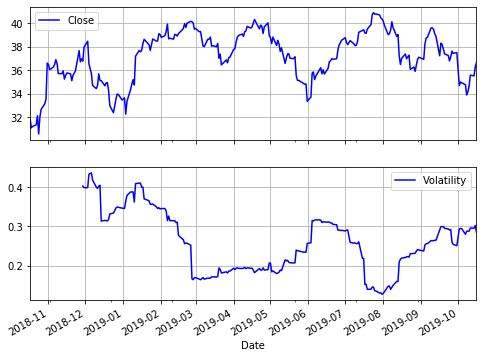

In [2]:
%matplotlib inline
historical_prices[['Close','Volatility']].plot(subplots=True,Color='blue',figsize=(8,6),grid=True)